In [64]:
from textblob import TextBlob
import sys
import tweepy
from wordcloud import WordCloud 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
consumerKey = "your key"
consumerSecret = "your key"
accessToken = "your key"
accessTokenSecret = "your key"

In [34]:
auth = tweepy.OAuthHandler(consumer_key=consumerKey,
                           consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit= True)

# class tweepy.Client(bearer_token=None, consumer_key=consumerKey, consumer_secret=consumerSecret, access_token=accessToken, access_token_secret=accessTokenSecret, *, return_type=Response, wait_on_rate_limit=False)

In [52]:
# posts = api.user_timeline(screen_name="waitbutwhy", count = 100, lang = "en", tweet_mode = "extended")
posts = api.search("coronavirus", lang = "en", count = 100, tweet_mode = "extended")
i = 1
for tweet in posts[0:5]:

  print(str(i)+ ')' + tweet.full_text + "\n")
  # analysis = TextBlob(tweet.full_text)
  # print(analysis.sentiment)
  # print("")

  i += 1

1)RT @AP: The Emancipator newspaper was established in 1820 to push for the abolition of slavery. Two centuries later, it's being revived in…

2)RT @morgfair: Opinion | Covid-19 vaccine misinformation continues to erode confidence - The Washington Post https://t.co/Zclc8YHw3L

3)As Covid restrictions are about to end following this week's announcement by the Prime Minister these are the latest Covid case rates for each area of Peterborough...
https://t.co/d1ygXEBwqD

4)The global coronavirus caseload has topped 427.3 million, while the deaths have surged to more than 5.90 million and vaccinations to over 10.40 billion, according to Johns Hopkins University.

#Coronavirus #CovidVaccine #Russia 
https://t.co/eV5XJLy79z

5)Last year, wealthy nations snapped most of the available shots to inoculate their own #citizens first, meaning less than a third of people in low-income #countries have been #vaccinated so far compared with more than 70 per cent in richer nations

https://t.co/RMhjhFBYF

In [47]:
#creating a dataframe with a column called tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

#showing first 5 rows of data
df.head()


,Tweets
0,RT @drkerrynphelps: Queensland health expert s...
1,RT @DavidDavisMP: What should we make of @Bori...
2,RT @LisaBro17329616: @GundamNorthrop @FlipFlap...
3,RT @AshilyUg: Before the coronavirus (COVID-19...
4,RT @sophielouisecc: Why hasn’t the coronavirus...


In [51]:
#cleaning the text
#createing a function to clean the tweets
def CleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # removing @
  text = re.sub(r'#', '', text) #removing #
  text = re.sub(r'RT[\s]+', '', text) #removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #removing links

  return text

df['Tweets'] = df['Tweets'].apply(CleanTxt)

df

,Tweets
0,: Queensland health expert says it is too earl...
1,: What should we make of claims that the Gove...
2,: \nThe entire world has cell phones.🤦🏻‍♀️
3,: Before the coronavirus (COVID-19) pandemic h...
4,: Why hasn’t the coronavirus act been repealed...
...,...
95,_Post: For the first time since the beginning ...
96,The coronavirus positivity ratio in Pakistan r...
97,Hong Kong's finance chief on Wednesday unveile...
98,_Post: For the first time since the beginning ...


In [55]:
import textblob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity  

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,: Queensland health expert says it is too earl...,0.300000,0.100
1,: What should we make of claims that the Gove...,0.000000,0.000
2,: \nThe entire world has cell phones.🤦🏻‍♀️,0.625000,0.000
3,: Before the coronavirus (COVID-19) pandemic h...,1.000000,1.000
4,: Why hasn’t the coronavirus act been repealed...,0.357143,0.000
...,...,...,...
95,_Post: For the first time since the beginning ...,0.333333,0.250
96,The coronavirus positivity ratio in Pakistan r...,0.066667,0.000
97,Hong Kong's finance chief on Wednesday unveile...,1.000000,-1.000
98,_Post: For the first time since the beginning ...,0.333333,0.250


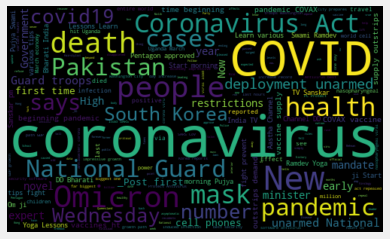

In [67]:
#wordcloud

allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height=300, random_state= 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [68]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'  

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df


,Tweets,Subjectivity,Polarity,Analysis
0,: Queensland health expert says it is too earl...,0.300000,0.100,Positive
1,: What should we make of claims that the Gove...,0.000000,0.000,Neutral
2,: \nThe entire world has cell phones.🤦🏻‍♀️,0.625000,0.000,Neutral
3,: Before the coronavirus (COVID-19) pandemic h...,1.000000,1.000,Positive
4,: Why hasn’t the coronavirus act been repealed...,0.357143,0.000,Neutral
...,...,...,...,...
95,_Post: For the first time since the beginning ...,0.333333,0.250,Positive
96,The coronavirus positivity ratio in Pakistan r...,0.066667,0.000,Neutral
97,Hong Kong's finance chief on Wednesday unveile...,1.000000,-1.000,Negative
98,_Post: For the first time since the beginning ...,0.333333,0.250,Positive


In [72]:
#printing all the positive tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'): 
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1

1): Queensland health expert says it is too early to lift COVID-19 mask mandate - ABC News 

2): Before the coronavirus (COVID-19) pandemic hit Uganda in March 2020, the economy was on an impressive growth path. GDP growth…

3): While I am pleased to see the Government ending most covid restrictions, I am disappointed the Coronavirus Act 2020 is no…

4): 🚨 Self-isolation regulations (requiring people isolate when Covid positive or close contact if not vaccinated) revoked fro…

5)_Post: For the first time since the beginning of the pandemic: COVAX vaccine supply outstrips demand.

COVID | vaccines 

ht…

6): Before the coronavirus (COVID-19) pandemic hit Uganda in March 2020, the economy was on an impressive growth path. GDP growth…

7)3,154 more people recover from coronavirus in Pakistan 

Follow our updates on coronavirus here: 

8)Before the coronavirus (COVID-19) pandemic hit Uganda in March 2020, the economy was on an impressive growth path. GDP growth was at 6.5% in FY2018/19, 0.

In [73]:
#printing negative tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False') 
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'): 
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) _B_man  That was proven false sir



2): _SG     
Not true. 
You DO know i…

3) Absolutely NOT, the CoronaVirus Covid_19 😷 OmicronVariant restrictions 🙄 should have been removed months ago 👋✌️👍💪 Now we can all just live alongside the viruses, as we do with the common cold &amp; influenza each year 😊👍

4): Real data:
Of the 2639 reported Covid deaths - 2556 were directly due to the virus, while 83 people died from other cause…

5)_Graham: Never in the history of mankind have we locked down the healthy people; we have quarantined the sick if needed, but no…

6)_SG     
Not true. 
You DO know it's near impossible to hide things in the age of cell phones, right?

7): A U.S. official says the Pentagon is expected to approve the deployment of 700 to 800 unarmed National Guard troops to the nation's…

8)IT’S OUT. DON’T MISS EPISODE 3 OF: WAIT TIL YOU HEAR THIS!

How To Fix The Police In America.        

American ”Hidden” History 

Monumental Mess

Back To School, Are We Fools?

Asymptomat

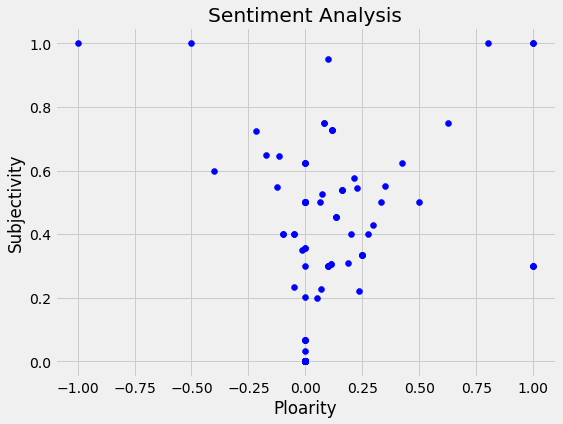

In [74]:
#plotting the polarity abd subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Ploarity')
plt.ylabel('Subjectivity')
plt.show()  

In [78]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round(ptweets.shape[0] / df.shape[0] *100, 1)

43.0

In [80]:
#Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round(ntweets.shape[0] / df.shape[0] *100, 1)

14.0

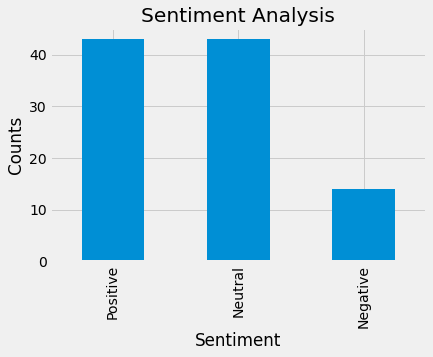

In [87]:
#show the value counts

df['Analysis'].value_counts()

#ploting counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()